In [8]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime, timedelta

import pandas.io.data as web

In [9]:
end = datetime.now()
start = end + timedelta(weeks=-52)

In [10]:
ctx = web.DataReader('ctx.ax', 'yahoo', start, end)

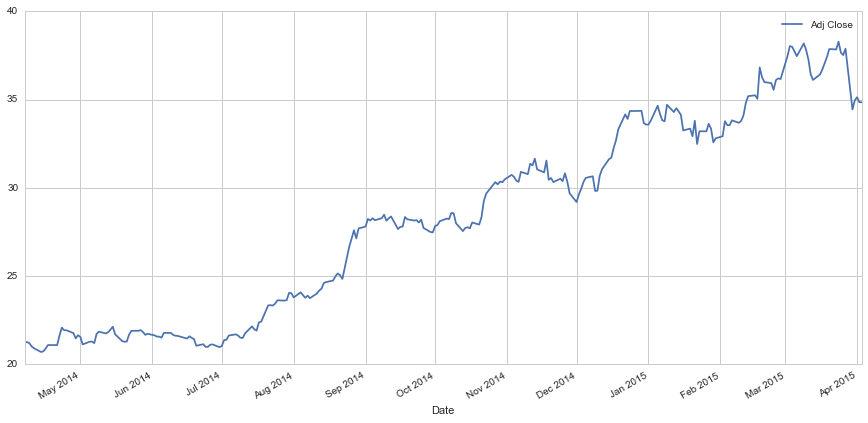

In [15]:
ctx['Adj Close'].plot(legend=True,figsize=(15,7))

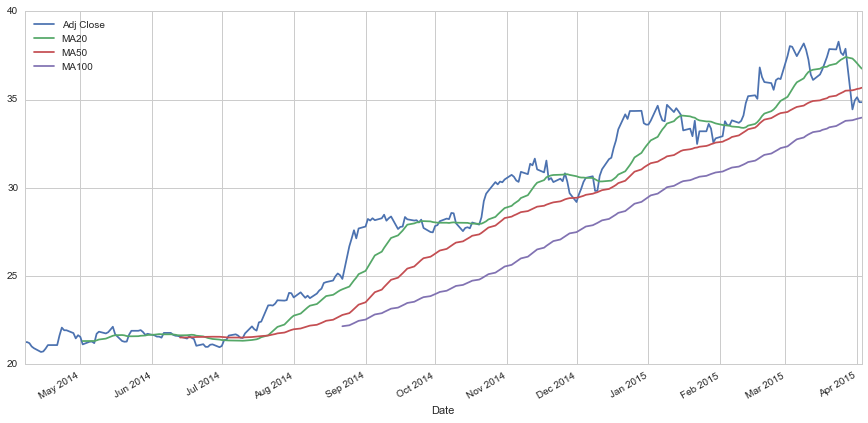

In [21]:
# Calc moving averages

periods = [20, 50, 100]

for p in periods:
    ctx["MA{0}".format(p)] = pd.rolling_mean(ctx['Adj Close'], p)
    
ctx[['Adj Close', 'MA20', 'MA50', 'MA100']].plot(subplots=False, figsize=(15,7))

In [24]:
# Calc Daily Returns

ctx['Daily Return'] = ctx['Adj Close'].pct_change()
ctx['Daily Return'].describe()

count    258.000000
mean       0.002025
std        0.014413
min       -0.090813
25%       -0.004727
50%        0.000591
75%        0.009477
max        0.074507
Name: Daily Return, dtype: float64

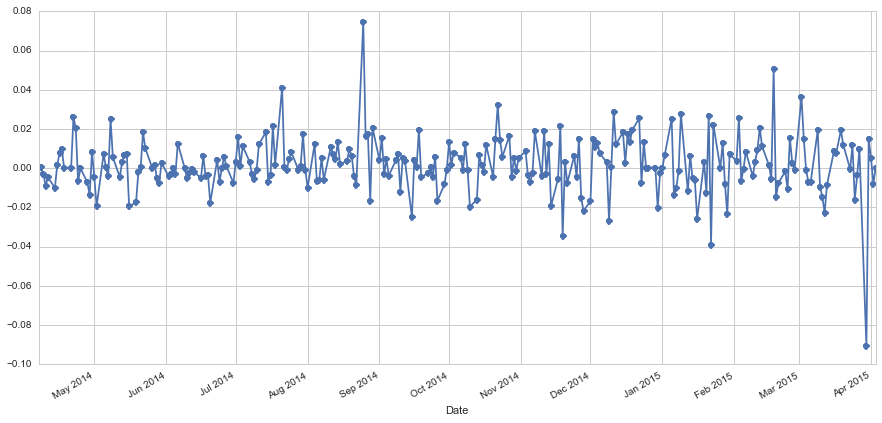

In [27]:
ctx['Daily Return'].plot(figsize=(15,7), marker='o')

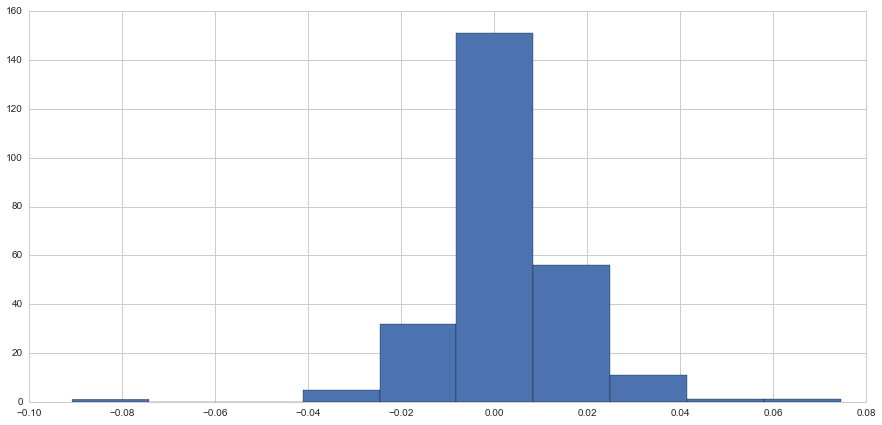

In [31]:
ctx['Daily Return'].hist(figsize=(15,7))

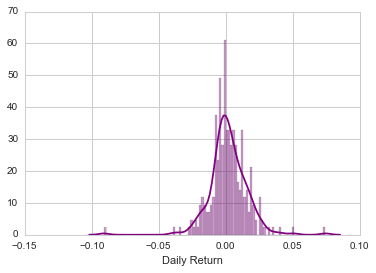

In [32]:
sns.distplot(ctx['Daily Return'].dropna(),bins=100,color='purple')